In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

import itertools
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
from literal_listener import StatelessLiteralListener
from literal_speaker import LiteralSpeaker
from pragmatic_listener import PragmaticListener
from learner import LearnerAgent

from configuration import TRUE_REWARDS

from visualizations import visualize_pragmatic_beliefs, plot_point_estimate

# Cache Pragmatic Results

In [3]:
import json
import time

human_utterances = json.load(open("data/exp_utterances.json"))

## Pragmatic - Uncertain

In [4]:
n_trials = 25
alphaS = 3
n_iters = 5

utterances_to_use = human_utterances
prior_var = 5
importance_samples = 100
unique_str="-v4-ER"


exp_literal = StatelessLiteralListener()
exp_speaker = LiteralSpeaker(exp_literal, utterances="exp", alphaS=alphaS)
exp_pragmatic_listener = PragmaticListener(exp_speaker)

start_time_ms = round(time.time() * 1000)   

for i, u in enumerate(utterances_to_use):

    pragmatic = LearnerAgent.cache_pragmatic_thompson_sampling(exp_pragmatic_listener, u["utt"], u["action_context"], 
                                                               horizons=[1,2,4], workerid=u['workerid'],
                                                               n_trials=n_trials, prior_var=prior_var, 
                                                               min_importance_samples=importance_samples, 
                                                               n_iterations=n_iters, verbose=False,
                                                               unique_str=unique_str)

    if i%500 == 0:
        end_time_ms = round(time.time() * 1000)
        n_seconds = (end_time_ms - start_time_ms) / 1000
        print(f'Finished utterance {i} of {len(utterances_to_use)}, took {n_seconds} seconds.')
        start_time_ms = end_time_ms

Finished utterance 0 of 2772, took 0.036 seconds.
Finished utterance 500 of 2772, took 1.05 seconds.
Finished utterance 1000 of 2772, took 0.992 seconds.
Finished utterance 1500 of 2772, took 0.987 seconds.
Finished utterance 2000 of 2772, took 0.983 seconds.
Finished utterance 2500 of 2772, took 0.986 seconds.


## Pragmatic - Misaligned

In [5]:
start_time_ms = round(time.time() * 1000)   

for i, u in enumerate(utterances_to_use):

    pragmatic = LearnerAgent.cache_pragmatic_thompson_sampling(exp_pragmatic_listener,
                                                               u["utt"], u["action_context"], 
                                                               workerid=u['workerid'], unique_str=unique_str, 
                                                               prior_var=prior_var, min_importance_samples=importance_samples,
                                                               n_iterations=n_iters, n_trials=n_trials, verbose=False,
                                                               horizons=[1]) # This changes

    if i%500 == 0:
        end_time_ms = round(time.time() * 1000)
        n_seconds = (end_time_ms - start_time_ms) / 1000
        print(f'Finished utterance {i} of {len(utterances_to_use)}, took {n_seconds} seconds.')
        start_time_ms = end_time_ms

Finished utterance 0 of 2772, took 0.003 seconds.
Finished utterance 500 of 2772, took 1.064 seconds.
Finished utterance 1000 of 2772, took 1.022 seconds.
Finished utterance 1500 of 2772, took 1.005 seconds.
Finished utterance 2000 of 2772, took 1.001 seconds.
Finished utterance 2500 of 2772, took 1.004 seconds.


In [6]:
start_time_ms = round(time.time() * 1000)   

for i, u in enumerate(utterances_to_use):

    pragmatic = LearnerAgent.cache_pragmatic_thompson_sampling(exp_pragmatic_listener,
                                                               u["utt"], u["action_context"], 
                                                               workerid=u['workerid'], unique_str=unique_str, 
                                                               prior_var=prior_var, min_importance_samples=importance_samples,
                                                               n_iterations=n_iters, n_trials=n_trials, verbose=False,
                                                               horizons=[4]) # This changes

    if i%500 == 0:
        end_time_ms = round(time.time() * 1000)
        n_seconds = (end_time_ms - start_time_ms) / 1000
        print(f'Finished utterance {i} of {len(utterances_to_use)}, took {n_seconds} seconds.')
        start_time_ms = end_time_ms

Finished utterance 0 of 2772, took 0.003 seconds.
Finished utterance 500 of 2772, took 1.011 seconds.
Finished utterance 1000 of 2772, took 1.018 seconds.
Finished utterance 1500 of 2772, took 1.037 seconds.
Finished utterance 2000 of 2772, took 1.012 seconds.
Finished utterance 2500 of 2772, took 1.031 seconds.


## Pragmatic - Known

In [7]:
start_time_ms = round(time.time() * 1000)   

for i, u in enumerate(utterances_to_use):
    
    pragmatic = LearnerAgent.cache_pragmatic_thompson_sampling(exp_pragmatic_listener,
                                                               u["utt"], u["action_context"], 
                                                               workerid=u['workerid'], unique_str=unique_str, 
                                                               prior_var=prior_var, min_importance_samples=importance_samples,
                                                               n_iterations=n_iters, n_trials=n_trials, verbose=False,
                                                               horizons=[u["horizon"]]) # This changes

    if i%500 == 0:
        end_time_ms = round(time.time() * 1000)
        n_seconds = (end_time_ms - start_time_ms) / 1000
        print(f'Finished utterance {i} of {len(utterances_to_use)}, took {n_seconds} seconds.')
        start_time_ms = end_time_ms

Finished utterance 0 of 2772, took 0.002 seconds.
Finished utterance 500 of 2772, took 1.006 seconds.
Finished utterance 1000 of 2772, took 0.974 seconds.
Finished utterance 1500 of 2772, took 0.948 seconds.
Finished utterance 2000 of 2772, took 0.981 seconds.
Finished utterance 2500 of 2772, took 0.989 seconds.


# Load cached results

In [8]:
from configuration import utt_to_string

results = []

pragmatics_list = ["pragmatic_uncertain", 
                   "pragmatic_misaligned_conservative", 
                   "pragmatic_misaligned_pedagogic", 
                   "pragmatic_aligned"]

for i, u in enumerate(utterances_to_use):
    
    for pragmatics in pragmatics_list:
        
        if pragmatics == "pragmatic_uncertain":
            horizons = [1, 2, 4]
        elif pragmatics == "pragmatic_aligned":
            horizons = [u["horizon"]]
        elif pragmatics == "pragmatic_misaligned_conservative":
            horizons = [1]
        elif pragmatics == "pragmatic_misaligned_pedagogic":
            horizons = [4]
        
        pragmatic = LearnerAgent.cache_pragmatic_thompson_sampling(exp_pragmatic_listener,
                                                                   u["utt"], u["action_context"], 
                                                                   workerid=u['workerid'], unique_str=unique_str, 
                                                                   prior_var=prior_var, min_importance_samples=importance_samples,
                                                                   n_iterations=n_iters, n_trials=n_trials,
                                                                   horizons=horizons) # This changes
        pragmatic["listener"] = pragmatics

        pragmatic["alphaS"] = alphaS
        pragmatic["horizon"] = u["horizon"]

        for k in ["color", "shape", "feature", "value", "type"]:
            pragmatic[k] = u["utt"].get(k)

        utt_str = utt_to_string(u["utt"])
        pragmatic["utt"] = utt_str
        pragmatic["utt_key"] = f'{u["action_context"]}-{utt_str}'

        pragmatic["trial_iteration_key"] = pragmatic["iteration"].apply(lambda x: f'{u["action_context"]}-{u["workerid"]}-{x}')

        pragmatic["random_effects_key"] = f'{u["action_context"]}-{u["workerid"]}'
        results.append(pragmatic)    

## Literal

In [9]:
for i, u in enumerate(utterances_to_use):
    
    random_effects_key = f'{u["action_context"]}-{u["workerid"]}'
        
    literal = LearnerAgent.cache_literal_thompson_sampling(u["utt"], unique_str=random_effects_key,
                                                           n_iterations=n_iters, 
                                                           n_trials=n_trials, 
                                                           prior_var=prior_var,
                                                           min_importance_samples=importance_samples,
                                                           verbose=False)
    
    literal["listener"] = "literal"
    literal["utt"] = utt_str

    for k in ["color", "shape", "feature", "value", "type"]:
        literal[k] = u.get(k)
        
    literal["trial_iteration_key"] = literal["iteration"].apply(lambda x: f'{u}-{x}')
    literal['random_effects_key'] = random_effects_key
    results.append(literal)  
    
    if i%500 == 0:
        print(f'Finished {n_iters} iters on utterance {i}.')

Finished 5 iters on utterance 0.
Finished 5 iters on utterance 500.
Finished 5 iters on utterance 1000.
Finished 5 iters on utterance 1500.
Finished 5 iters on utterance 2000.
Finished 5 iters on utterance 2500.


## Individual Baseline

In [10]:
for i, u in enumerate(utterances_to_use):
    
    random_effects_key = f'{u["action_context"]}-{u["workerid"]}'
    
    individual_learning_results = LearnerAgent.cache_individual_thompson_sampling(n_iterations=n_iters,  
                                                                                  n_trials=n_trials, 
                                                                                  prior_var=prior_var, 
                                                                                  unique_str=random_effects_key)
    
    individual_learning_results["listener"] = "individual"
        
    individual_learning_results["trial_iteration_key"] = literal["iteration"].apply(lambda x: f'{u}-{x}')
    individual_learning_results['random_effects_key'] = random_effects_key
    results.append(individual_learning_results)  
    
    if i%500 == 0:
        print(f'Finished {n_iters} iters on utterance {i}.')

Finished 5 iters on utterance 0.
Finished 5 iters on utterance 500.
Finished 5 iters on utterance 1000.
Finished 5 iters on utterance 1500.
Finished 5 iters on utterance 2000.
Finished 5 iters on utterance 2500.


## Plot Results

In [12]:
results = pd.concat(results)
results["horizon"] = results.horizon.fillna("N/A")

In [13]:
# Should have 2772 * 5 trials for each listener
results.groupby(["listener"]).trial_iteration_key.nunique() / 5

listener
individual                           2772.0
literal                              2772.0
pragmatic_aligned                    2772.0
pragmatic_misaligned_conservative    2772.0
pragmatic_misaligned_pedagogic       2772.0
pragmatic_uncertain                  2772.0
Name: trial_iteration_key, dtype: float64

In [14]:
import copy 

to_plot = copy.deepcopy(results)

In [15]:
rename_dict = {"pragmatic_uncertain": "Pragmatic - Latent $H$", "literal": "Literal Listener", "individual": "Individual Learner"}
to_plot = to_plot[to_plot.listener.isin(list(rename_dict.keys()))]

to_plot["listener"] = to_plot.listener.apply(lambda x: rename_dict.get(x, x))
hue_order = ["Pragmatic - Latent $H$", "Literal Listener", "Individual Learner"]
palette = ['green', 'black', 'gray']

Text(0.5, 0, 'Individual Learning Actions')

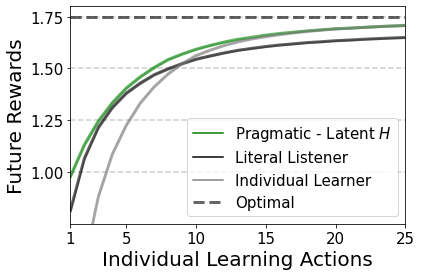

In [16]:
sns.lineplot(data=to_plot, x='trial', y='future_rewards', hue='listener', hue_order=hue_order, palette=palette,
             linewidth=3, alpha=.6)

plt.ylim(.75, 1.8) 
plt.axhline(1.75, c='k', label="Optimal", linestyle='--', linewidth=3, alpha=.6)
plt.legend(loc='best', fontsize=15)

ys = [1, 1.25, 1.5, 1.75]
for y in ys:
    plt.axhline(y, c='k', alpha=.2, linestyle='--', zorder=0)

plt.yticks(ys, fontsize=15)
plt.ylabel("Future Rewards", fontsize=20)
plt.xticks([1, 5, 10, 15, 20, 25], fontsize=15)
plt.xlim(1, 25);
plt.xlabel("Individual Learning Actions", fontsize=20)

# plt.xlim(.5, 15)

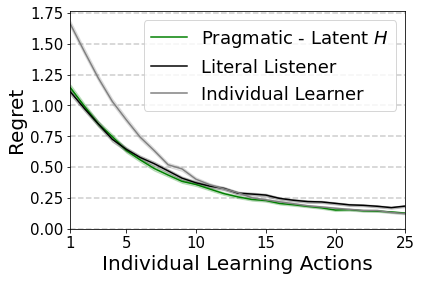

In [17]:
sns.lineplot(data=to_plot, x='trial', y='regret', hue='listener', hue_order=hue_order, palette=palette)

ys=[0, .25, .5, .75, 1, 1.25, 1.5, 1.75]
plt.yticks(ys, fontsize=15)
for y in ys:
    plt.axhline(y, c='k', alpha=.2, linestyle='--', zorder=0)

plt.ylabel("Regret", fontsize=20)
plt.xticks([1, 5, 10, 15, 20, 25], fontsize=15)
plt.xlim(1, 25);
plt.xlabel("Individual Learning Actions", fontsize=20)
plt.legend(fontsize=18)

## Summarize Results

In [18]:
results_to_summarize = results

### Regret @ 25

In [19]:
regret_totals = results_to_summarize.groupby(["listener", "trial_iteration_key"])["regret"].sum().reset_index()

In [20]:
regret_totals.groupby("listener").regret.agg(np.mean).round(2)

listener
individual                           12.14
literal                              10.23
pragmatic_aligned                     9.42
pragmatic_misaligned_conservative     9.76
pragmatic_misaligned_pedagogic        9.67
pragmatic_uncertain                   9.55
Name: regret, dtype: float64

In [21]:
### Export to R
for_r = results_to_summarize.groupby(["listener", "trial_iteration_key", "random_effects_key"]).regret.sum().reset_index()
for_r["centered_regret"] = for_r.regret - for_r.regret.mean()

for_r

,listener,trial_iteration_key,random_effects_key,regret,centered_regret
0,individual,"{'action_context': [{'color': 'blue', 'shape':...","[{'color': 'blue', 'shape': 'circle'}, {'color...",8,-2.128595
1,individual,"{'action_context': [{'color': 'blue', 'shape':...","[{'color': 'blue', 'shape': 'circle'}, {'color...",8,-2.128595
2,individual,"{'action_context': [{'color': 'blue', 'shape':...","[{'color': 'blue', 'shape': 'circle'}, {'color...",16,5.871405
3,individual,"{'action_context': [{'color': 'blue', 'shape':...","[{'color': 'blue', 'shape': 'circle'}, {'color...",8,-2.128595
4,individual,"{'action_context': [{'color': 'blue', 'shape':...","[{'color': 'blue', 'shape': 'circle'}, {'color...",27,16.871405
...,...,...,...,...,...
83155,pragmatic_uncertain,"[{'color': 'red', 'shape': 'circle'}, {'color'...","[{'color': 'red', 'shape': 'circle'}, {'color'...",14,3.871405
83156,pragmatic_uncertain,"[{'color': 'red', 'shape': 'circle'}, {'color'...","[{'color': 'red', 'shape': 'circle'}, {'color'...",10,-0.128595
83157,pragmatic_uncertain,"[{'color': 'red', 'shape': 'circle'}, {'color'...","[{'color': 'red', 'shape': 'circle'}, {'color'...",16,5.871405
83158,pragmatic_uncertain,"[{'color': 'red', 'shape': 'circle'}, {'color'...","[{'color': 'red', 'shape': 'circle'}, {'color'...",11,0.871405


In [22]:
for_r.to_csv("regret_results_for_r.csv", index=False)

# Simulation Details


## Gaussian Prior
How wide should initial variance be?

First, we want this to be large in order to approximate a uniform on the interval [-2, 2]  
However, for importance-sampling we need to sample from it and stay within the (-2.5, 2.5) range.

With variance=5 and 6 dimensions, we should get 66% of samples within (-2.5, 2.5) which means .66^6 ~~ 8% of our initial samples will be accepted.

In [23]:
from scipy.stats import norm
import math

variance = 5

interval = norm.interval(.66, loc=0, scale=math.sqrt(variance))
acceptance = .66**6

print(f'Interval of {interval} --> acceptance of {acceptance}.')

Interval of (-2.1335783678031857, 2.133578367803187) --> acceptance of 0.08265395001600002.
